In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.rename(columns={"CustomerID":"id","Genre":"gender","Age":"age","Annual Income (k$)":"income","Spending Score (1-100)":"score"},inplace=True)

In [4]:
df

,id,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df.isnull().sum()

id        0
gender    0
age       0
income    0
score     0
dtype: int64

Text(0, 0.5, 'score')

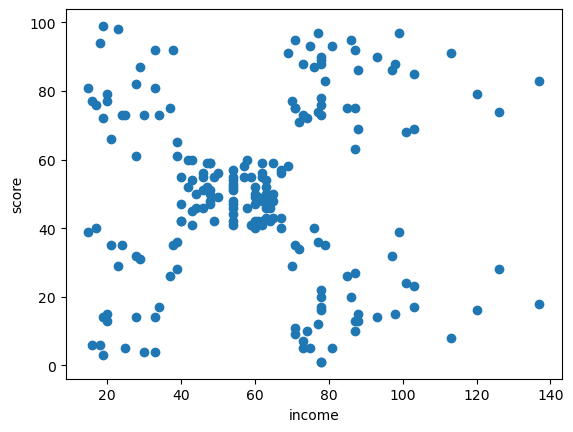

In [7]:
plt.scatter(df["income"],df["score"])
plt.xlabel("income")
plt.ylabel("score")

In [10]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5)
km.fit(df[["income","score"]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [11]:
km.cluster_centers_

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513]])

In [12]:
df["cluster_group"]=km.labels_
df

,id,gender,age,income,score,cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,3
197,198,Male,32,126,74,4
198,199,Male,32,137,18,3


In [13]:
df["cluster_group"].value_counts()

1    81
4    39
3    35
0    23
2    22
Name: cluster_group, dtype: int64

<Axes: xlabel='income', ylabel='score'>

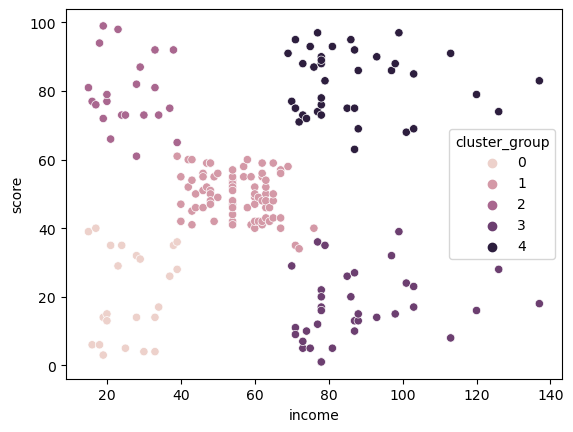

In [15]:
sns.scatterplot(x="income",y="score",data=df,hue="cluster_group")

In [16]:
most_expensive_buyers=df[df["cluster_group"]==4]
most_expensive_buyers

,id,gender,age,income,score,cluster_group
123,124,Male,39,69,91,4
125,126,Female,31,70,77,4
127,128,Male,40,71,95,4
129,130,Male,38,71,75,4
131,132,Male,39,71,75,4
133,134,Female,31,72,71,4
135,136,Female,29,73,88,4
137,138,Male,32,73,73,4
139,140,Female,35,74,72,4
141,142,Male,32,75,93,4
